In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv('/content/chatgpt11.csv')

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
for i in df.columns:

    df[i] = le.fit_transform(df[i])

In [ ]:
import pandas as pd
data = pd.read_csv('https://tinyurl.com/3eu93hat')


In [ ]:
# Remove rows with missing values

data=df
# Remove unnecessary columns
data = data[['Text', 'Language', 'RetweetCount', 'LikeCount', 'ReplyCount']]

# Convert Language column to categorical data
data['Language'] = pd.Categorical(data['Language'])

# Convert Retweets, Favorites, and Replies columns to integer data type
data['RetweetCount'] = data['RetweetCount'].astype(int)
data['LikeCount'] = data['LikeCount'].astype(int)
data['ReplyCount'] = data['ReplyCount'].astype(int)


<ipython-input-7-a7c3347446cd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Language'] = pd.Categorical(data['Language'])
<ipython-input-7-a7c3347446cd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RetweetCount'] = data['RetweetCount'].astype(int)
<ipython-input-7-a7c3347446cd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [ ]:
from sklearn.model_selection import train_test_split

X = data['Text']
y = data[['RetweetCount', 'LikeCount', 'ReplyCount']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_vec = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_vec = vectorizer.transform(X_test)

# Alternatively, you can use TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_vec_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_vec_tfidf = tfidf_vectorizer.transform(X_test)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import MultinomialNB

# Create decision tree regressor object
dt = DecisionTreeRegressor()

# Train the model
dt.fit(X_train_vec, y_train['RetweetCount'])

# Predict on the test data
y_pred_dt = dt.predict(X_test_vec)

# Similarly, you can create and train the other models
rf = RandomForestRegressor()
rf.fit(X_train_vec, y_train['RetweetCount'])
y_pred_rf = rf.predict(X_test_vec)

knn = KNeighborsRegressor()
knn.fit(X_train_vec, y_train['RetweetCount'])
y_pred_knn = knn.predict(X_test_vec)

nb = MultinomialNB()
nb.fit(X_train_vec, y_train['RetweetCount'])
y_pred_nb = nb.predict(X_test_vec)


In [ ]:
from sklearn.cluster import KMeans

# Create KMeans object
kmeans = KMeans(n_clusters=3)

# Fit and transform the vectorized data
X_vec = vectorizer.fit_transform(X)
clusters = kmeans.fit_predict(X_vec)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# Preprocess the data
# Assume `df` is the DataFrame containing the tweet data with relevant columns

# Remove duplicates
df.drop_duplicates(subset='Text', inplace=True)
df.dropna(inplace=True)

# Define the feature set and target variables
X = df['Text']  # Features: text content of the tweets
y_retweets = df['RetweetCount']  # Target variable: number of retweets
y_likes = df['LikeCount']  # Target variable: number of likes
y_replies = df['ReplyCount']  # Target variable: number of replies

# Vectorize the feature data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train_retweets, y_test_retweets = train_test_split(X_tfidf, y_retweets, test_size=0.2, random_state=42)
_, _, y_train_likes, y_test_likes = train_test_split(X_tfidf, y_likes, test_size=0.2, random_state=42)
_, _, y_train_replies, y_test_replies = train_test_split(X_tfidf, y_replies, test_size=0.2, random_state=42)

# Train the KNN model for retweets
knn_retweets = KNeighborsRegressor(n_neighbors=5)
knn_retweets.fit(X_train, y_train_retweets)

# Predict on the testing set for retweets
y_pred_retweets = knn_retweets.predict(X_test)

# Train the KNN model for likes
knn_likes = KNeighborsRegressor(n_neighbors=5)
knn_likes.fit(X_train, y_train_likes)

# Predict on the testing set for likes
y_pred_likes = knn_likes.predict(X_test)

# Train the KNN model for replies
knn_replies = KNeighborsRegressor(n_neighbors=5)
knn_replies.fit(X_train, y_train_replies)

# Predict on the testing set for replies
y_pred_replies = knn_replies.predict(X_test)

# Visualize the predictions
plt.figure(figsize=(12, 4))

# Plot for retweets
plt.subplot(131)
plt.scatter(y_test_retweets, y_pred_retweets)
plt.xlabel('Actual Retweets')
plt.ylabel('Predicted Retweets')
plt.title('Retweets')

# Plot for likes
plt.subplot(132)
plt.scatter(y_test_likes, y_pred_likes)
plt.xlabel('Actual Likes')
plt.ylabel('Predicted Likes')
plt.title('Likes')

# Plot for replies
plt.subplot(133)
plt.scatter(y_test_replies, y_pred_replies)
plt.xlabel('Actual Replies')
plt.ylabel('Predicted Replies')
plt.title('Replies')

plt.tight_layout()
plt.show()

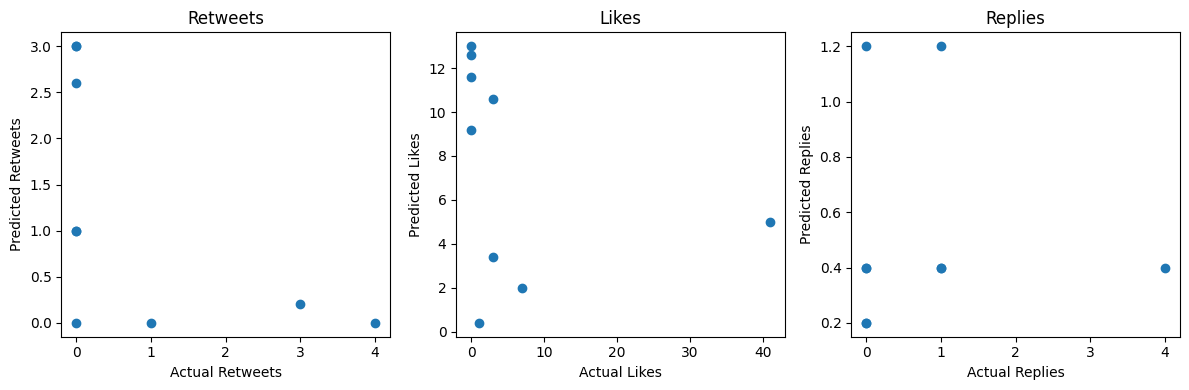

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# Preprocess the data
# Assume `df` is the DataFrame containing the tweet data with relevant columns
df = pd.read_csv('/content/chatgpt11.csv')
# Remove duplicates
df.drop_duplicates(subset='Text', inplace=True)
df.dropna(inplace=True)

# Define the feature set and target variables
X = df['Text']  # Features: text content of the tweets
y_retweets = df['RetweetCount']  # Target variable: number of retweets
y_likes = df['LikeCount']  # Target variable: number of likes
y_replies = df['ReplyCount']  # Target variable: number of replies

# Vectorize the feature data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train_retweets, y_test_retweets = train_test_split(X_tfidf, y_retweets, test_size=0.2, random_state=42)
_, _, y_train_likes, y_test_likes = train_test_split(X_tfidf, y_likes, test_size=0.2, random_state=42)
_, _, y_train_replies, y_test_replies = train_test_split(X_tfidf, y_replies, test_size=0.2, random_state=42)

# Train the KNN model for retweets
knn_retweets = KNeighborsRegressor(n_neighbors=5)
knn_retweets.fit(X_train, y_train_retweets)

# Predict on the testing set for retweets
y_pred_retweets = knn_retweets.predict(X_test)

# Train the KNN model for likes
knn_likes = KNeighborsRegressor(n_neighbors=5)
knn_likes.fit(X_train, y_train_likes)

# Predict on the testing set for likes
y_pred_likes = knn_likes.predict(X_test)

# Train the KNN model for replies
knn_replies = KNeighborsRegressor(n_neighbors=5)
knn_replies.fit(X_train, y_train_replies)

# Predict on the testing set for replies
y_pred_replies = knn_replies.predict(X_test)

# Visualize the predictions
plt.figure(figsize=(12, 4))

# Plot for retweets
plt.subplot(131)
plt.scatter(y_test_retweets, y_pred_retweets)
plt.xlabel('Actual Retweets')
plt.ylabel('Predicted Retweets')
plt.title('Retweets')

# Plot for likes
plt.subplot(132)
plt.scatter(y_test_likes, y_pred_likes)
plt.xlabel('Actual Likes')
plt.ylabel('Predicted Likes')
plt.title('Likes')

# Plot for replies
plt.subplot(133)
plt.scatter(y_test_replies, y_pred_replies)
plt.xlabel('Actual Replies')
plt.ylabel('Predicted Replies')
plt.title('Replies')

plt.tight_layout()
plt.show()
